In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [17]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(0.1, 200.1, 101)
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

# get the range of k values
k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
k_vals = fft.fftshift(k_vals)
# k_vals = 2 * np.pi * k_vals
# print(k_vals)
print(f"shape of k_vals : {k_vals.shape}")

[1.000e-01 2.100e+00 4.100e+00 6.100e+00 8.100e+00 1.010e+01 1.210e+01
 1.410e+01 1.610e+01 1.810e+01 2.010e+01 2.210e+01 2.410e+01 2.610e+01
 2.810e+01 3.010e+01 3.210e+01 3.410e+01 3.610e+01 3.810e+01 4.010e+01
 4.210e+01 4.410e+01 4.610e+01 4.810e+01 5.010e+01 5.210e+01 5.410e+01
 5.610e+01 5.810e+01 6.010e+01 6.210e+01 6.410e+01 6.610e+01 6.810e+01
 7.010e+01 7.210e+01 7.410e+01 7.610e+01 7.810e+01 8.010e+01 8.210e+01
 8.410e+01 8.610e+01 8.810e+01 9.010e+01 9.210e+01 9.410e+01 9.610e+01
 9.810e+01 1.001e+02 1.021e+02 1.041e+02 1.061e+02 1.081e+02 1.101e+02
 1.121e+02 1.141e+02 1.161e+02 1.181e+02 1.201e+02 1.221e+02 1.241e+02
 1.261e+02 1.281e+02 1.301e+02 1.321e+02 1.341e+02 1.361e+02 1.381e+02
 1.401e+02 1.421e+02 1.441e+02 1.461e+02 1.481e+02 1.501e+02 1.521e+02
 1.541e+02 1.561e+02 1.581e+02 1.601e+02 1.621e+02 1.641e+02 1.661e+02
 1.681e+02 1.701e+02 1.721e+02 1.741e+02 1.761e+02 1.781e+02 1.801e+02
 1.821e+02 1.841e+02 1.861e+02 1.881e+02 1.901e+02 1.921e+02 1.941e+02
 1.961

In [18]:
alpha0 = 0.5
d0 = 2.0

In [19]:
u_test = np.zeros((num_frames, k_vals.shape[0]))
for i in range(num_frames):
    for j in range(k_vals.shape[0]):
        u_test[i, j] = s_vals[i]**(alpha0-1) / (s_vals[i]**(alpha0) + d0*k_vals[j]**2)
# print(u_test)
# print(np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)[0])
# u_test = u_test / np.trapz(u_test, k_vals, axis=1).reshape(-1, 1)

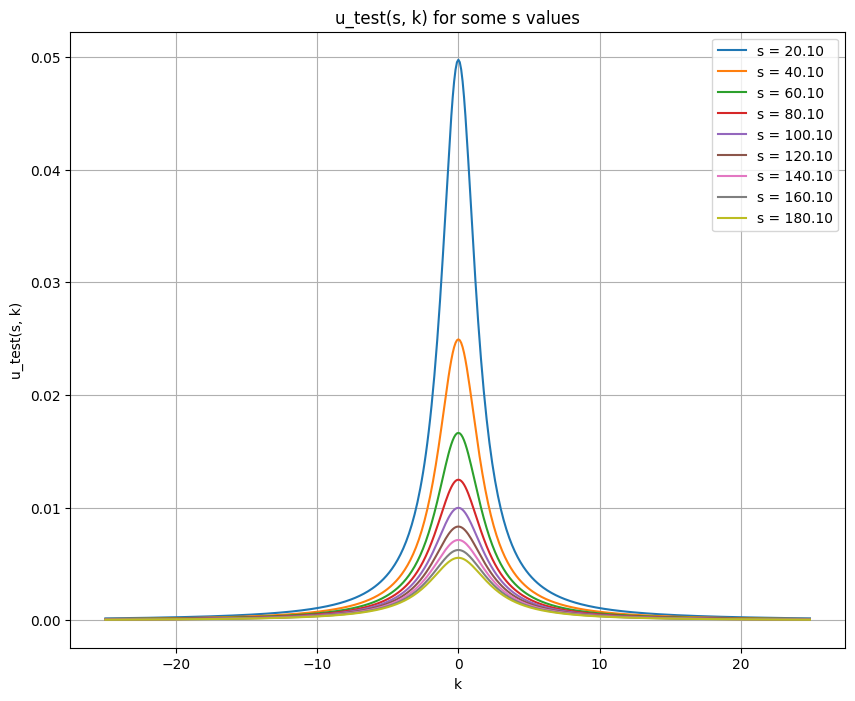

In [20]:
# plot u_test
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_test(s, k)")
plt.grid()
for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.plot(k_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

$u(s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$